<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>  </center></font></h1>
<h2><font color='0B5345'> <center>Proyecto 3: Filtros </center></font></h2>
<font  face="Courier New" size="3">
<p1><center> Catalina Guerra - Juan Esteban Campillo - Angie Tovar</center></p1>

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>


#### **Importanción de librerias**

In [ ]:
!pip install PyWavelets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import scipy
from scipy import fft
from scipy.signal import detrend
import scipy.io as sio;
import scipy.signal as signal
import pywt
import math
from scipy.signal import welch

#### **2. De la base de datos extraer los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation). Esta información está en el archivo Diagnostics.xlsx**

#### **2.1 Carga del archivo**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp /content/drive/MyDrive/ECGData.zip .


#### **2.2 Extracción de los registros que correspondan a bradicardia sinusal**

In [ ]:
df_pacientes = pd.read_excel('/content/drive/MyDrive/Diagnostics.xlsx')
SB = df_pacientes[df_pacientes['Rhythm'] == 'SB']
SB_files = SB['FileName'].tolist()


zip_path = 'ECGData.zip'
output_dir = 'ECGData/FilteredFiles'

os.makedirs(output_dir, exist_ok=True)
extracted_files = []

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        if any(sb_file in file_name for sb_file in SB_files):
            zip_ref.extract(file_name, output_dir)
            extracted_files.append(file_name)

bradicardia_sinusal = pd.DataFrame(extracted_files, columns=['ExtractedFiles'])
print(bradicardia_sinusal)

####**2.3 Extracción de los registros que correspondan a fibrilación auricular**

In [ ]:
df_pacientes = pd.read_excel('/content/drive/MyDrive/Diagnostics.xlsx')
AFIB = df_pacientes[df_pacientes['Rhythm'] == 'AFIB']
AFIB_files = AFIB['FileName'].tolist()


zip_path = 'ECGData.zip'
output_dir = 'ECGDataDenoised/FilteredFiles'

os.makedirs(output_dir, exist_ok=True)
extracted_files1 = []

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        if any(sb_file in file_name for sb_file in AFIB_files):
            zip_ref.extract(file_name, output_dir)
            extracted_files1.append(file_name)

fibrilación_auricular = pd.DataFrame(extracted_files1, columns=['ExtractedFiles'])
print(fibrilación_auricular)

#### **3. Consultar que otros tipos de señales wavelet se pueden usar para el análisis de señales ECG y adaptar el código del filtro wavelet que se entrega en el curso de acuerdo a la consulta**

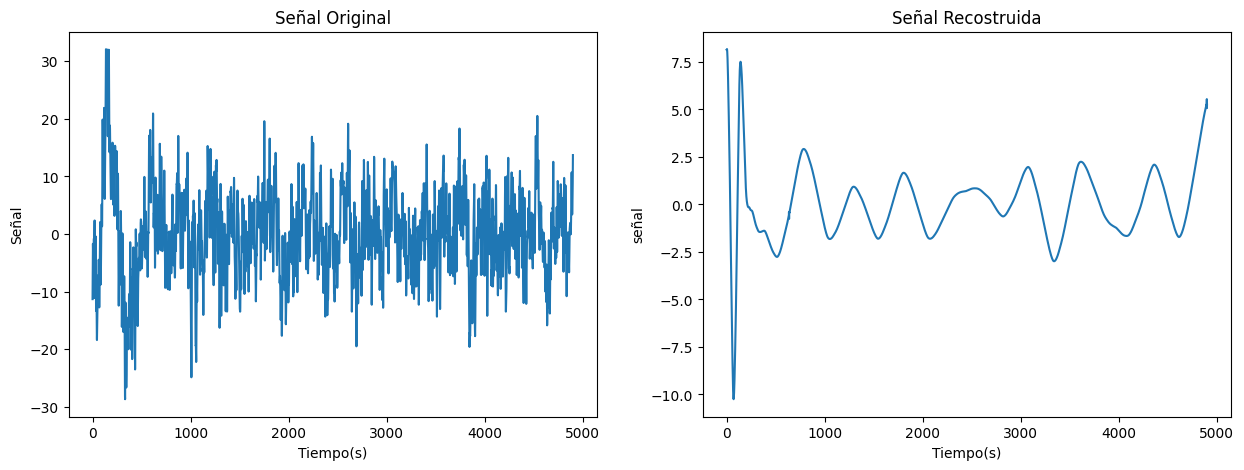

In [ ]:
def wnoisest(coeff):
    stdc = np.zeros((len(coeff),1));
    for i in range(0,len(coeff)):
        stdc[i] = (np.median(np.absolute(coeff[i])))/0.6745;
    return stdc;

def threshold(coeff):
    Num_samples = 0;
    for i in range(0,len(coeff)):
        Num_samples = Num_samples + coeff[i].shape[0];

    thr = np.sqrt(2*(np.log(Num_samples)))
    return thr

def wthresh(coeff):
    y   = list();
    s = wnoisest(coeff);
    thr = threshold(coeff)
    for i in range(0,len(coeff)):
        y.append(np.multiply(coeff[i],np.abs(coeff[i])>(thr*s[i])));
    return thr,s,y;


mat_contents = sio.loadmat('senal_prueba_wavelet.mat')
data = np.squeeze(mat_contents['senal']);

LL = int(np.floor(np.log2(data.shape[0])));

data_wavelet = pywt.wavedec( data, 'sym6', level=8 );


details = data_wavelet[1:]
thr, s, details_t = wthresh(details);

coeff = list()
coeff.append(data_wavelet[0])
for i in range(len(details_t)):
  coeff.append(details_t[i])

figuresize = (15,5)
plt.figure(figsize=figuresize)
plt.subplot(1,2,1)
plt.plot(data)
plt.title('Señal Original')
plt.xlabel('Tiempo(s)')
plt.ylabel('Señal')

x_rec = pywt.waverec( coeff, 'sym6');
x_rec = x_rec[0:data.shape[0]];

plt.subplot(1,2,2)
plt.plot(x_rec)
plt.title('Señal Recostruida')
plt.xlabel('Tiempo(s)')
plt.ylabel('señal')
plt.show()


#### **4. Escoger 10 señales al azar y aplicar un flujo de procesamiento**

In [ ]:
!unzip ECGData.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: ECGData/MUSE_20180116_125802_57000.csv  
  inflating: ECGData/MUSE_20180116_125812_73000.csv  
  inflating: ECGData/MUSE_20180116_125822_43000.csv  
  inflating: ECGData/MUSE_20180116_125825_58000.csv  
  inflating: ECGData/MUSE_20180116_125842_09000.csv  
  inflating: ECGData/MUSE_20180116_125845_27000.csv  
  inflating: ECGData/MUSE_20180116_125847_39000.csv  
  inflating: ECGData/MUSE_20180116_125906_02000.csv  
  inflating: ECGData/MUSE_20180116_125918_29000.csv  
  inflating: ECGData/MUSE_20180116_125919_34000.csv  
  inflating: ECGData/MUSE_20180116_125921_43000.csv  
  inflating: ECGData/MUSE_20180116_125925_64000.csv  
  inflating: ECGData/MUSE_20180116_125946_45000.csv  
  inflating: ECGData/MUSE_20180116_125948_54000.csv  
  inflating: ECGData/MUSE_20180116_130000_80000.csv  
  inflating: ECGData/MUSE_20180116_130002_89000.csv  
  inflating: ECGData/MUSE_20180116_130009_24000.csv  
  inflating: ECGData/

In [ ]:
# Archivo de fibrilación auricular
datos_1 = pd.read_csv('/content/ECGData/MUSE_20180712_161449_58000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_1 = datos_1.drop(0).reset_index(drop=True)
datos_1['II'] = pd.to_numeric(datos_1['II'], errors='coerce')

datos_2 = pd.read_csv('/content/ECGData/MUSE_20180111_155203_15000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_2 = datos_2.drop(0).reset_index(drop=True)
datos_2['II'] = pd.to_numeric(datos_2['II'], errors='coerce')

datos_3 = pd.read_csv('/content/ECGData/MUSE_20180712_161505_16000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_3 = datos_3.drop(0).reset_index(drop=True)
datos_3['II'] = pd.to_numeric(datos_3['II'], errors='coerce')

datos_4 = pd.read_csv('/content/ECGData/MUSE_20180111_155945_02000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_4 = datos_4.drop(0).reset_index(drop=True)
datos_4['II'] = pd.to_numeric(datos_4['II'], errors='coerce')

datos_5 = pd.read_csv('/content/ECGData/MUSE_20180712_161503_00000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_5 = datos_5.drop(0).reset_index(drop=True)
datos_5['II'] = pd.to_numeric(datos_5['II'], errors='coerce')

datos_6 = pd.read_csv('/content/ECGData/MUSE_20180111_155758_17000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_6 = datos_6.drop(0).reset_index(drop=True)
datos_6['II'] = pd.to_numeric(datos_6['II'], errors='coerce')

datos_7 = pd.read_csv('/content/ECGData/MUSE_20180111_155859_36000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_7 = datos_7.drop(0).reset_index(drop=True)
datos_7['II'] = pd.to_numeric(datos_7['II'], errors='coerce')

datos_8 = pd.read_csv('/content/ECGData/MUSE_20180120_123813_67000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_8 = datos_8.drop(0).reset_index(drop=True)
datos_8['II'] = pd.to_numeric(datos_8['II'], errors='coerce')

datos_9 = pd.read_csv('/content/ECGData/MUSE_20180120_123811_50000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_9 = datos_9.drop(0).reset_index(drop=True)
datos_9['II'] = pd.to_numeric(datos_9['II'], errors='coerce')

datos_10 = pd.read_csv('/content/ECGData/MUSE_20180111_160033_11000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_10 = datos_10.drop(0).reset_index(drop=True)
datos_10['II'] = pd.to_numeric(datos_10['II'], errors='coerce')



In [ ]:
s_list = [
    datos_1['II'].values,
    datos_2['II'].values,
    datos_3['II'].values,
    datos_4['II'].values,
    datos_5['II'].values,
    datos_6['II'].values,
    datos_7['II'].values,
    datos_8['II'].values,
    datos_9['II'].values,
    datos_10['II'].values
]


#### **4.1 Flujo 1**

#### 4.1.1 Filtro pasa-altas usando filtro IIR a 0.5 Hz. Justificar la elección de parámetros y si se usa FIR o IIR:

In [ ]:
Fs = 500
nyquist = Fs/2
wn = 0.5/nyquist
order = 5
n_b, d_b = signal.iirfilter(order + 1, wn, btype="highpass")
list_filtro_paltas = [signal.filtfilt(n_b, d_b, s) for s in s_list]

#### 4.1.2 Filtro wavelet modificado

In [ ]:
def process_signal_wavelet(signal, wavelet='sym6'):

    def wnoisest(coeff):
        stdc = np.zeros((len(coeff), 1))
        for i in range(len(coeff)):
            stdc[i] = (np.median(np.abs(coeff[i]))) / 0.6745
        return stdc

    def threshold(coeff):
        Num_samples = sum(c.shape[0] for c in coeff)
        thr = np.sqrt(2 * (np.log(Num_samples)))
        return thr

    def wthresh(coeff):
        y = []
        s = wnoisest(coeff)
        thr = threshold(coeff)
        for i in range(len(coeff)):
            y.append(np.multiply(coeff[i], np.abs(coeff[i]) > (thr * s[i])))
        return thr, s, y


    LL = signal.shape[0]
    level = int(np.floor(np.log2(LL))) - 4


    data_wavelet = pywt.wavedec(signal, wavelet, level=level)

    details = data_wavelet[1:]
    thr, s, details_t = wthresh(details)

    coeff = [data_wavelet[0]] + details_t
    x_rec = pywt.waverec(coeff, wavelet)
    x_rec = x_rec[:LL]

    return x_rec


In [ ]:
lista_filtro_wavelet = [process_signal_wavelet(s) for s in list_filtro_paltas]


#### 4.1.3 Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR

In [ ]:
Fs = 500
nyquist = Fs/2
wn = 50/nyquist
order = 5
n_b, d_b = signal.iirfilter(order + 1, wn, btype="lowpass")
list_filtro_bajas = [signal.filtfilt(n_b, d_b, s) for s in lista_filtro_wavelet ]

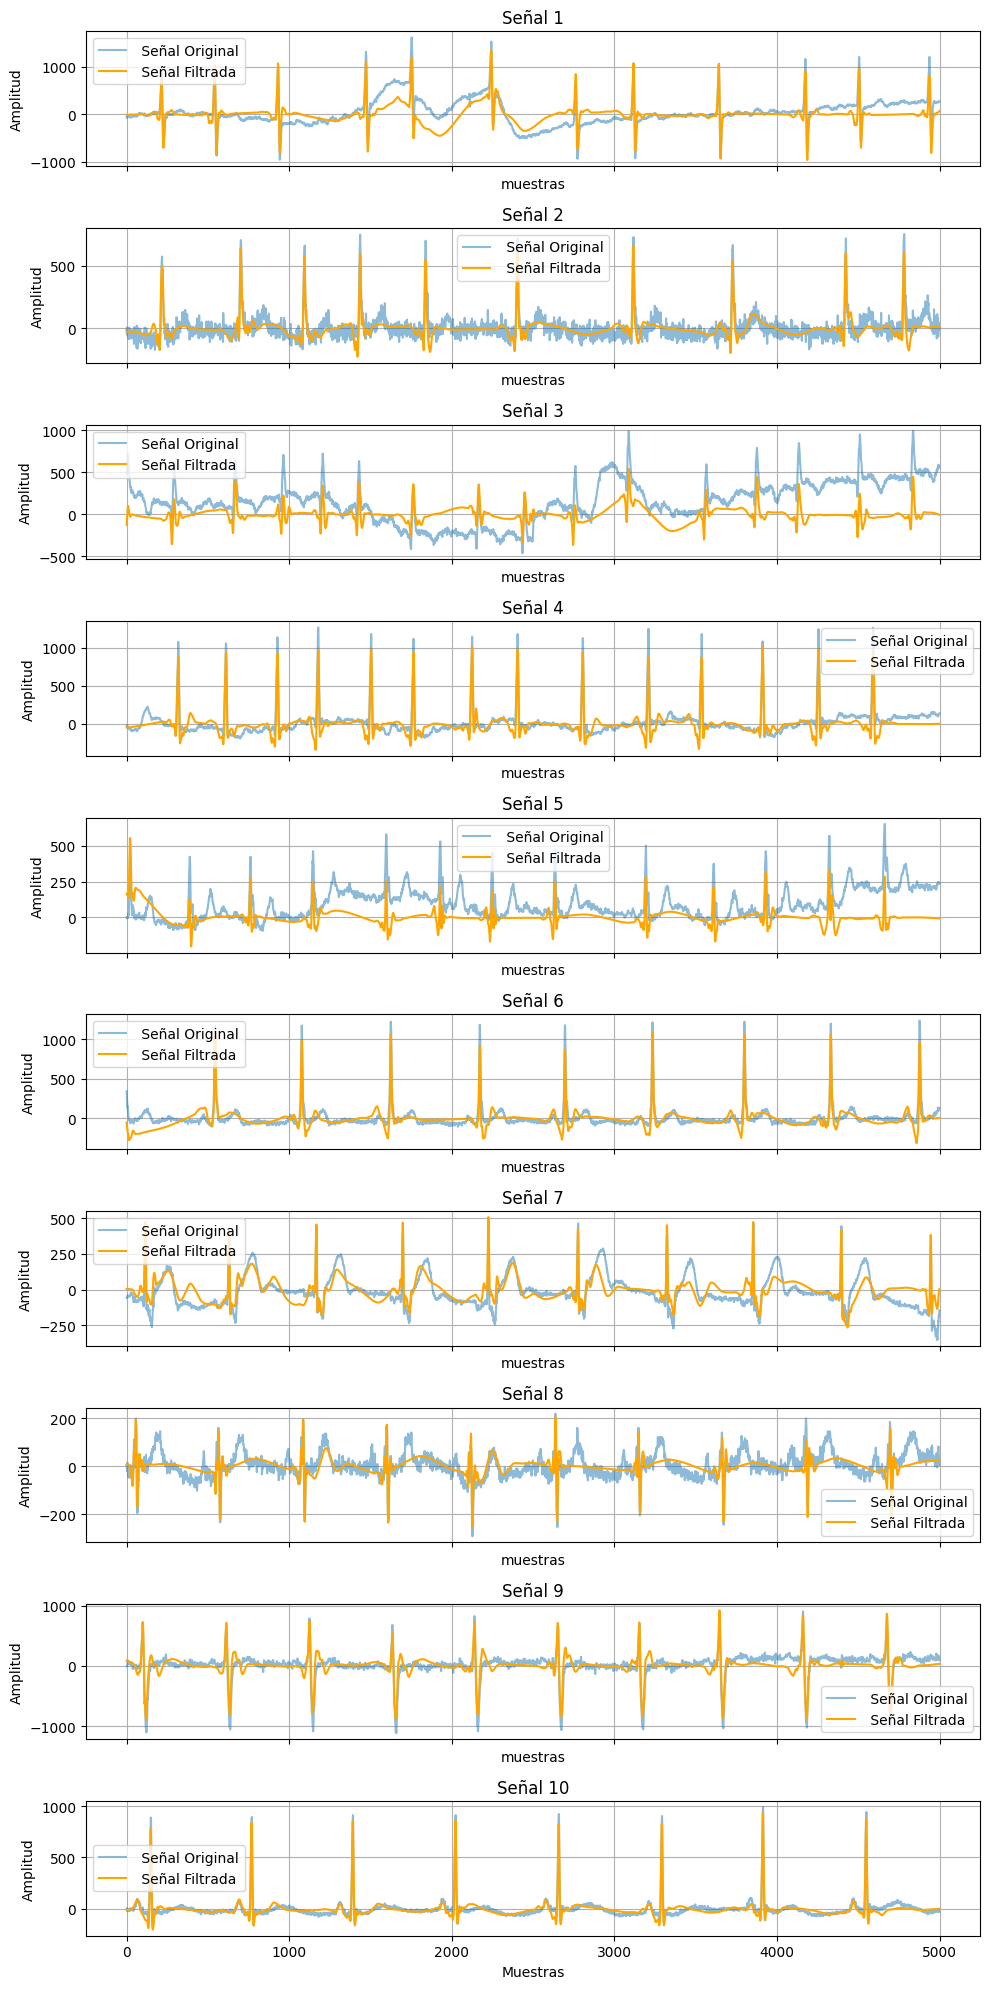

In [ ]:
num_signals = len(list_filtro_bajas)
fig, axs = plt.subplots(num_signals, 1, figsize=(10,20), sharex=True)

for i in range(num_signals):
    axs[i].plot(s_list[i], label=' Señal Original', alpha=0.5)  # Señal original
    axs[i].plot(list_filtro_bajas[i], label=' Señal Filtrada', color='orange')  # Señal filtrada
    axs[i].set_title(f'Señal {i + 1}')
    axs[i].set_ylabel('Amplitud')
    axs[i].set_xlabel('muestras')
    axs[i].legend()
    axs[i].grid(True)

plt.xlabel('Muestras')
plt.tight_layout()
plt.show()

#### **4.2 Flujo 2**

#### 4.2.1 Detrend

In [ ]:
lista_detrend = [detrend(s) for s in s_list]

#### 4.2.2 Filtro wavelet modificado del punto 3

In [ ]:
lista_filtro_wavelet1 = [process_signal_wavelet(s) for s in lista_detrend]

#### 4.2.3 Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR

In [ ]:
list_filtro_bajas1 = [signal.filtfilt(n_b, d_b, s) for s in lista_filtro_wavelet1 ]

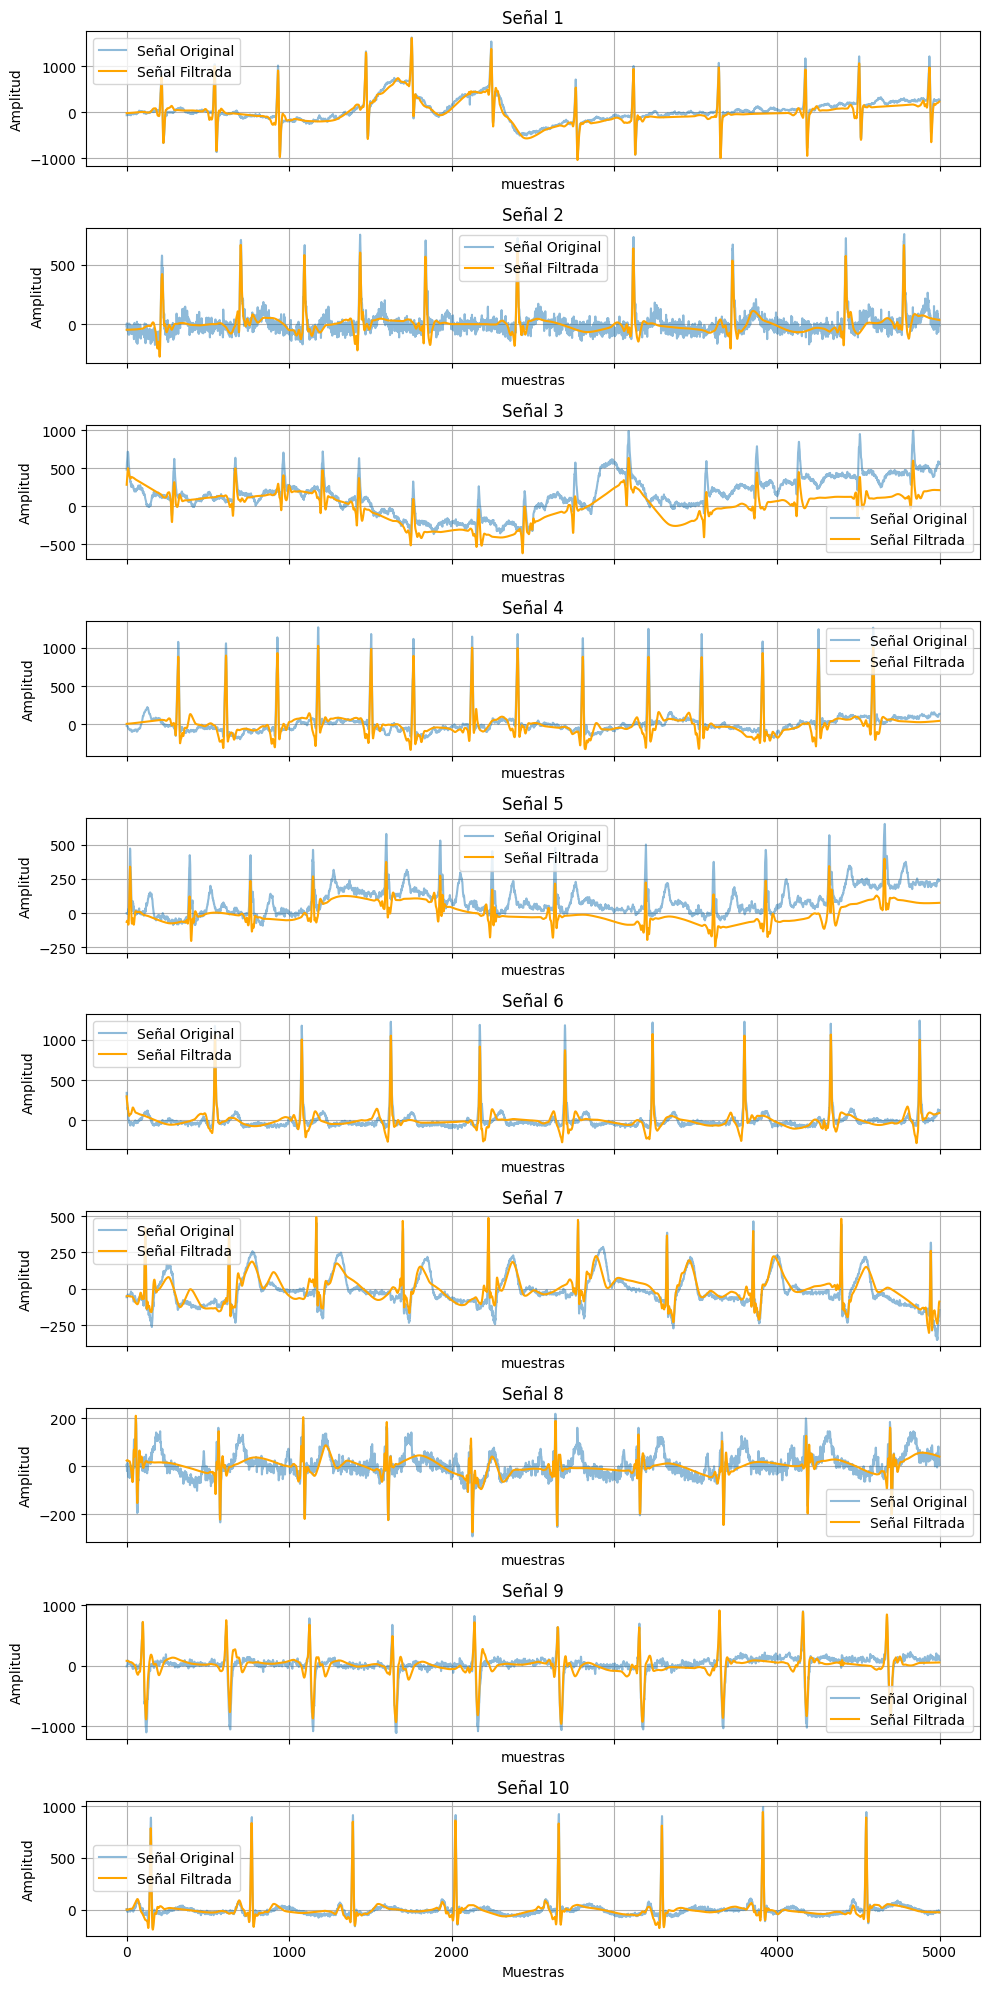

In [ ]:
num_signals = len(list_filtro_bajas1)
fig, axs = plt.subplots(num_signals, 1, figsize=(10,20), sharex=True)

for i in range(num_signals):
    axs[i].plot(s_list[i], label='Señal Original', alpha=0.5)  # Señal original
    axs[i].plot(list_filtro_bajas1[i], label='Señal Filtrada', color='orange')  # Señal filtrada
    axs[i].set_title(f'Señal {i + 1}')
    axs[i].set_ylabel('Amplitud')
    axs[i].set_xlabel('muestras')
    axs[i].legend()
    axs[i].grid(True)

plt.xlabel('Muestras')
plt.tight_layout()
plt.show()

#### **4.3 Flujo 3**

#### 4.3.1 Filtro pasa-altas usando filtro IIR a 0.5 Hz. Justificar la elección de parámetros y si se usa FIR o IIR

In [ ]:
list_filtro_paltas1 = [signal.filtfilt(n_b, d_b, s) for s in s_list]

#### 4.3.2 Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR

In [ ]:
list_filtro_bajas2 = [signal.filtfilt(n_b, d_b, s) for s in list_filtro_paltas1]


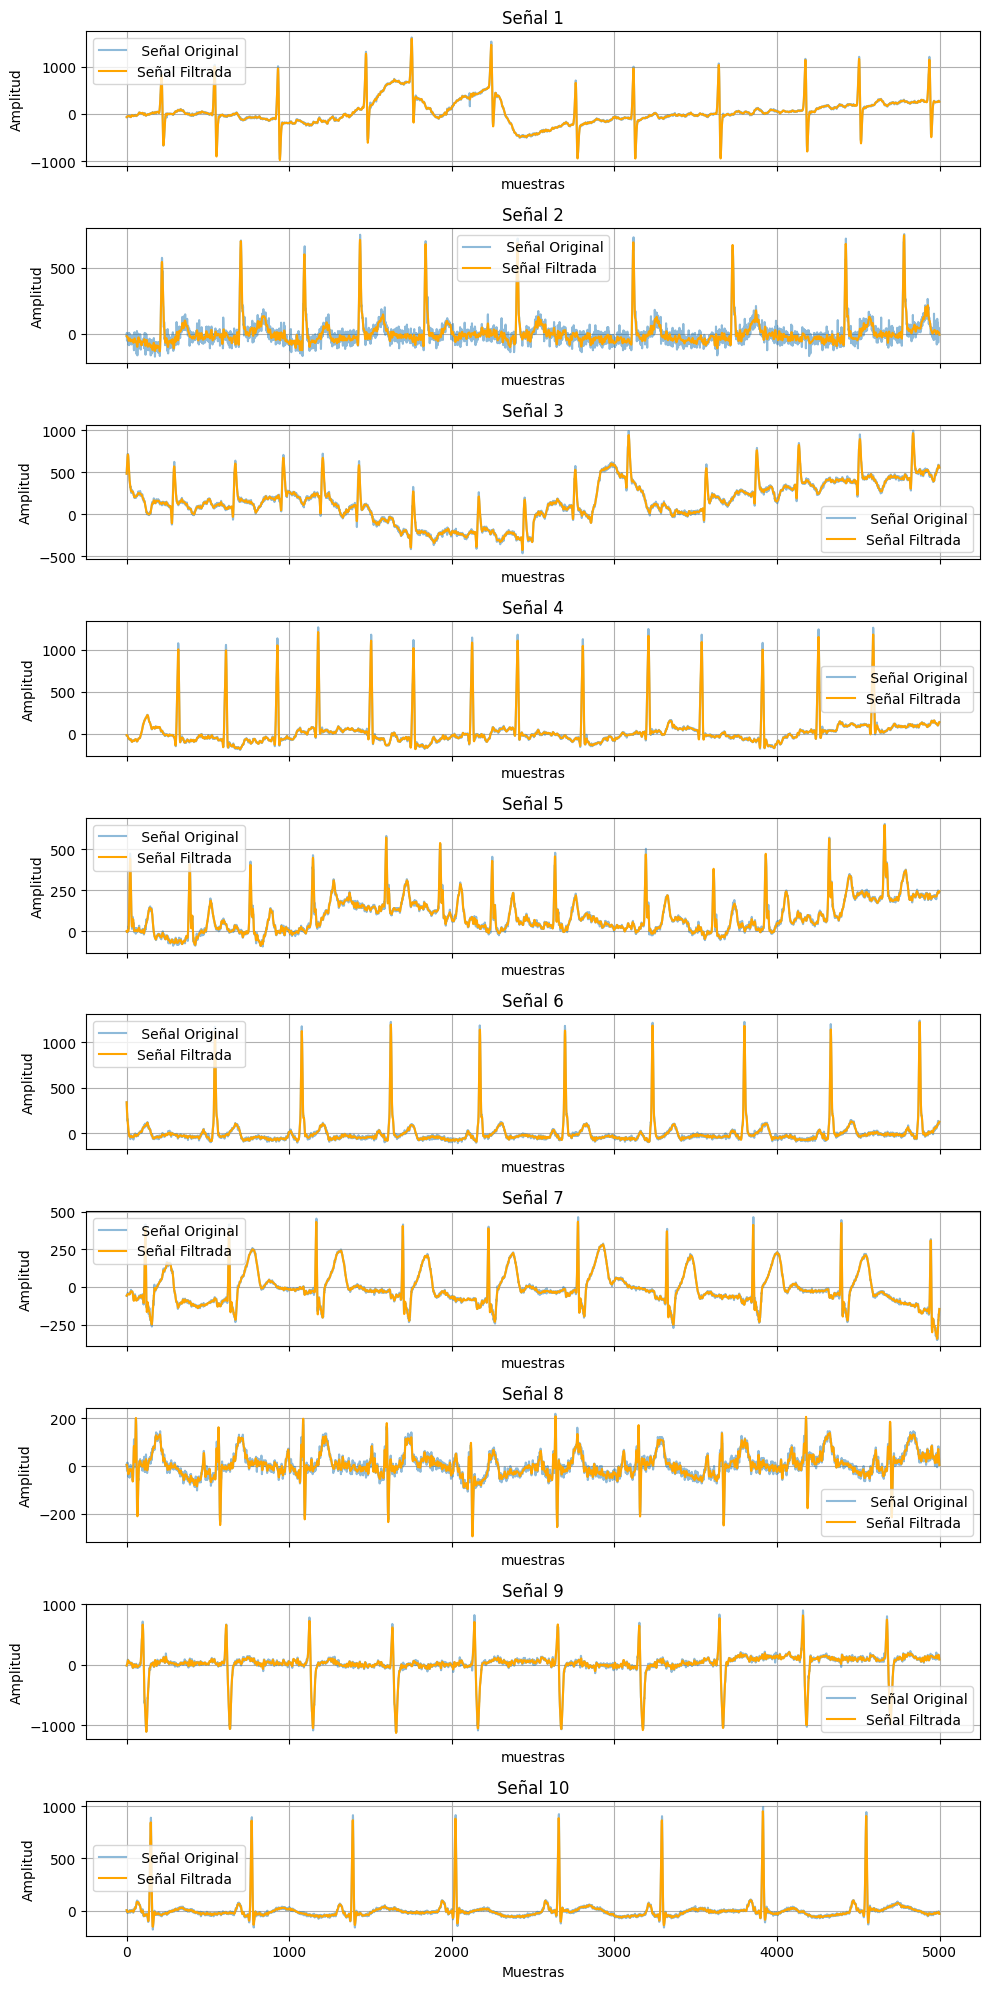

In [ ]:
num_signals = len(list_filtro_bajas2)
fig, axs = plt.subplots(num_signals, 1, figsize=(10,20), sharex=True)

for i in range(num_signals):
    axs[i].plot(s_list[i], label=' Señal Original', alpha=0.5)
    axs[i].plot(list_filtro_bajas2[i], label='Señal Filtrada', color='orange')
    axs[i].set_title(f'Señal {i + 1}')
    axs[i].set_ylabel('Amplitud')
    axs[i].set_xlabel('muestras')
    axs[i].legend()
    axs[i].grid(True)

plt.xlabel('Muestras')
plt.tight_layout()
plt.show()

####  **4.4 Describir los resultados obtenidos y decidir si el resto del procesamiento se hace con el flujo 1, el flujo 2 o el flujo 3**

El procesamiento del resto de los datos, se realizara con el flujo 2, en el informe se justifica la elección

#### **A las señales filtradas con el flujo seleccionado aplicar el procesamiento de normalización usado en el proyecto**

In [ ]:
def compresion(señal):
  max_value = np.max(np.abs(señal))
  min_value = np.min(np.abs(señal))
  compressed_ekg = (señal-min_value) / (max_value-min_value)

  return compressed_ekg

In [ ]:
def procesamiento_señal(señal):

# Carga de la señal
  datos_1 = pd.read_csv(f'/content/ECGData/{señal}' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
  señal_paciente = datos_1['II'].values[1::].astype(float)

# Filtrado con flujo 2

  filtro_1 = detrend(señal_paciente)
  filtro_2 = process_signal_wavelet(filtro_1)
  filtro_3 = signal.filtfilt(n_b, d_b, filtro_2)

# Procesamiento de normalización utilizado en el proyecto 2
  detrend_ekgf = detrend(filtro_3)
  señal_comprimida = compresion(filtro_3)

  return señal_comprimida

In [ ]:
#fibrilación
resultado = [element.split('ECGData/')[1] for element in extracted_files1]
fibrilacion_filtrada = []
for señal in resultado:
  fibrilacion_filtrada.append(procesamiento_señal(señal))

In [ ]:
#bradicardia
resultado1 = [element.split('ECGData/')[1] for element in extracted_files]
bradicardia_filtrada = []
for señal in resultado1[:1800]:
  try:
    bradicardia_filtrada.append(procesamiento_señal(señal))
  except Exception as e:
    print(f"Ocurrió un error con el elemento: {e}")

#### **5. Para cada señal extraer la frecuencia que contiene la máxima potencia usando Welch**

In [ ]:
def fMP(compressed_ekg):
  Fs = 500
  ancho_ventana = 1000
  solapamiento = int(ancho_ventana / 2)
  window = np.hanning(ancho_ventana)

  f, Pxx = welch(compressed_ekg, Fs, window=window, nperseg=ancho_ventana, noverlap=solapamiento)
  indice_max = np.argmax(Pxx)
  frecuencia_max = f[indice_max]

  return frecuencia_max

In [ ]:
fmp_fibrilacion = [fMP(s) for s in fibrilacion_filtrada]
fmp_bradicardia = [fMP(s) for s in bradicardia_filtrada]

#### **6. Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 al 5 y almacene los resultados en un dataframe donde se pueda registro, tipo de patología y el frecuencia de máxima potencia (fMP)**

In [ ]:
fibrilacion_P2 = np.loadtxt("t.txt")
Bradicardia_P2= np.loadtxt("t1.txt")

In [ ]:
array_bradicardia = np.full(1780, 'Bradicardia sinusal')
df1 = pd.DataFrame({
    'Registro': np.array(resultado1[:1780]),
    'Estado' : array_bradicardia,
    'fMP_Proyecto3': np.array(fmp_bradicardia[:1780]),
    'fMP_Proyecto2' : Bradicardia_P2[:1780]
})


In [ ]:
mean = df1['fMP_Proyecto2'].mean()
df1['fMP_Proyecto2'] = df1['fMP_Proyecto2'].replace(50, mean)

In [ ]:
array_fibrilacion = np.full(1780, 'fibrilacion auricular')
df = pd.DataFrame({
    'Registro': np.array(resultado),
    'Estado' : array_fibrilacion,
    'fMP_Proyecto3': np.array(fmp_fibrilacion),
    'fMP_Proyecto2' : fibrilacion_P2
})

In [ ]:
mean = df['fMP_Proyecto2'].mean()
df['fMP_Proyecto2'] = df['fMP_Proyecto2'].replace(50, mean)

In [ ]:
df_concatenado = pd.concat([df1, df], ignore_index=True)
df_concatenado

,Registro,Estado,fMP_Proyecto3,fMP_Proyecto2
0,MUSE_20180111_155758_17000.csv,Bradicardia sinusal,1.0,3.7
1,MUSE_20180111_155839_67000.csv,Bradicardia sinusal,1.0,2.9
2,MUSE_20180111_155859_36000.csv,Bradicardia sinusal,1.0,2.8
3,MUSE_20180111_155907_78000.csv,Bradicardia sinusal,0.5,2.8
4,MUSE_20180111_160033_11000.csv,Bradicardia sinusal,6.5,0.8
...,...,...,...,...
3555,MUSE_20180712_161449_58000.csv,fibrilacion auricular,1.0,12.4
3556,MUSE_20180712_161451_72000.csv,fibrilacion auricular,0.5,3.9
3557,MUSE_20180712_161452_78000.csv,fibrilacion auricular,0.5,3.2
3558,MUSE_20180712_161503_00000.csv,fibrilacion auricular,0.5,4.1


#### **7. Comparar los resultados de fMP del proyecto 3 con los del proyecto 2 usando estadística descriptiva: gráficos y pruebas de hipótesis**

Text(0.5, 1.0, 'fMP Fibrilación auricular')

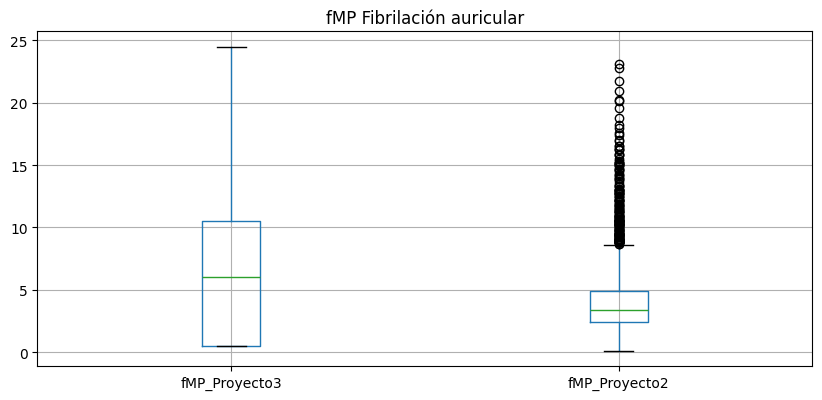

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 20))
plt.subplot(4,1,1)
df.boxplot()
plt.title('fMP Fibrilación auricular')

Text(0.5, 1.0, 'fMP Bradiardia sinusal')

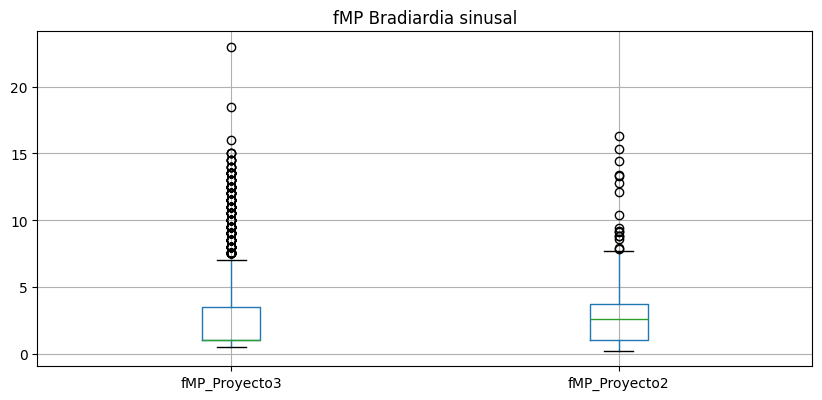

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 20))
plt.subplot(4,1,1)
df1.boxplot()

plt.title('fMP Bradiardia sinusal')

#### **Pruebas de hipotesis**

In [ ]:
from scipy import stats
from scipy.stats import mannwhitneyu


**Prueba de Normalidad**

In [ ]:
print('Normalidad Bradicardia sinusal: ')
_ , p_value_c = stats.shapiro(df1["fMP_Proyecto3"])
print(f'fMP_proyecto3: {p_value_c}')
_ , p_value_c = stats.shapiro(df1["fMP_Proyecto2"])
print(f'fMP_proyecto2: {p_value_c}')

print('Normalidad Fibrilacion auricular: ')
_ , p_value_c = stats.shapiro(df["fMP_Proyecto3"])
print(f'fMP_proyecto3: {p_value_c}')
_ , p_value_c = stats.shapiro(df["fMP_Proyecto2"])
print(f'fMP_proyecto2: {p_value_c}')

Normalidad Bradicardia sinusal: 
fMP_proyecto3: 1.2109677382183844e-50
fMP_proyecto2: 5.360338716805215e-40
Normalidad Fibrilacion auricular: 
fMP_proyecto3: 1.4415511080382088e-35
fMP_proyecto2: 3.4876076159698926e-43


**Prueba de independencia**

Son dos grupos *dependientes*, ya que aunque han sido procesadas de manera diferente ambas provienen de la misma fuente.

**Prueba de homocedasticidad**

In [ ]:
_, p_value = stats.levene(df1["fMP_Proyecto3"],df1["fMP_Proyecto2"])
print(p_value)
_, p_value = stats.levene(df["fMP_Proyecto3"],df["fMP_Proyecto2"])
print(p_value)

4.3350669431935126e-11
9.14939315963602e-194


**Prueba de U de mann whitney**

In [ ]:
statistic , p_value = mannwhitneyu(df1["fMP_Proyecto3"],df1["fMP_Proyecto2"])
print(p_value)
statistic , p_value = mannwhitneyu(df["fMP_Proyecto3"],df["fMP_Proyecto2"])
print(p_value)

1.6000214221668402e-10
0.0007349480366478733


Como todos los p- valor < 0.05 se rechaza Ho, lo que significa que los filtros analizados tienen una diferencia estadisticamente significativa entre ellos.